In [1]:
from google.colab import drive
drive.flush_and_unmount
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/TAMUIDS/flight_delays_clean2.csv', low_memory=False)
print('Dataframe dimensions:', df.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (10668316, 19)


,DAY_OF_WEEK,FL_DATE,CARRIER,Route,ORIGIN,DEST,TAXI_OUT,TAXI_IN,ARR_TIME,ARR_DELAY,DIVERTED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PASSENGERS,EMPTOTAL
column type,int64,object,object,int64,object,object,float64,float64,object,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Flights')

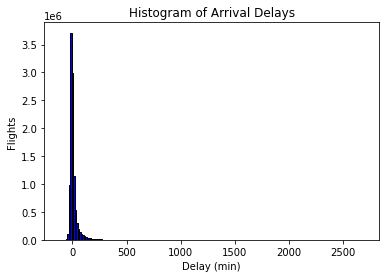

In [3]:
import matplotlib.pyplot as plt
plt.hist(df['ARR_DELAY'], color = 'blue', edgecolor = 'black', bins = 200)
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [0]:
import pandas as pd
Flights1 = pd.read_csv('/content/drive/My Drive/TAMUIDS/flight_delays_clean2.csv', low_memory=False)

In [0]:
#Removing the extreme delays

import numpy as np
Flights1['ARR_DELAY'] = Flights1['ARR_DELAY'].apply(lambda x:x if x < 300 else np.nan)
Flights1.dropna(how = 'any', inplace=True)


Flights1['ARR_DELAY'] = Flights1['ARR_DELAY'].apply(lambda x:x if x > -100 else np.nan)
Flights1.dropna(how = 'any', inplace=True)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [0]:
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(base_estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(base_estimator=Rid,random_state=2)

In [0]:
le = LabelEncoder()

In [0]:
#make catagorical values

Flights1['CARRIER']= le.fit_transform(Flights1['CARRIER'])
Flights1['ORIGIN'] = le.fit_transform(Flights1['ORIGIN'])
Flights1['DEST'] = le.fit_transform(Flights1['DEST'])

In [10]:
#Split into test and train data
df_train = Flights1[Flights1['FL_DATE'] <= '2019-03-31']
df_test = Flights1[Flights1['FL_DATE'] > '2019-03-31']
print("Shape of train Data: ", df_train.shape)
print("Shape of test Data: ", df_test.shape)

Shape of train Data:  (8800622, 19)
Shape of test Data:  (1831883, 19)


In [0]:
X_train = df_train.drop(['ARR_DELAY', 'ARR_TIME', 'FL_DATE'], axis = 1)
Y_train = df_train['ARR_DELAY']
X_test =  df_test.drop(['ARR_DELAY', 'ARR_TIME', 'FL_DATE'], axis = 1)
Y_test = df_test['ARR_DELAY']

In [0]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [0]:
for model, name in zip([Dtc], 
     ['Decision Tree Regressor']):
 
    model1 = model.fit(X_train_sc,Y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(Y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_predict)))
    print('R2 : ',r2_score(Y_test, Y_predict))
    print()

import matplotlib.pyplot as plt
print(name)
plt.scatter(Y_test, Y_predict)
plt.title("Model : Decision Tree Regressor")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.savefig('/content/drive/My Drive/TAMUIDS/Decision Tree Regressor.png',  bbox_inches='tight')

Linear Regression
Mean Absolute Error: 7.560702157809635
Mean Squared Error: 92.01690265505897
Root Mean Squared Error: 9.592544117962605
R2 :  0.9397749444927141

Linear Regression


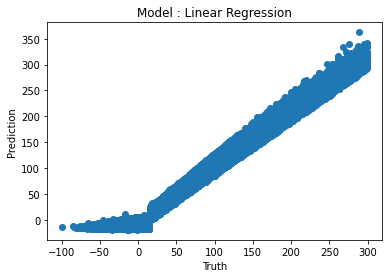

In [13]:
for model, name in zip([LinR], 
     ['Linear Regression']):
 
    model1 = model.fit(X_train_sc,Y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(Y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_predict)))
    print('R2 : ',r2_score(Y_test, Y_predict))
    print()

import matplotlib.pyplot as plt
print(name)
plt.scatter(Y_test, Y_predict)
plt.title("Model : Linear Regression")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.savefig('/content/drive/My Drive/TAMUIDS/Linear_Regression.png',  bbox_inches='tight')

Lasso
Mean Absolute Error: 7.969919495651267
Mean Squared Error: 99.57631154409837
Root Mean Squared Error: 9.978793090554507
R2 :  0.9348273119729443

Lasso


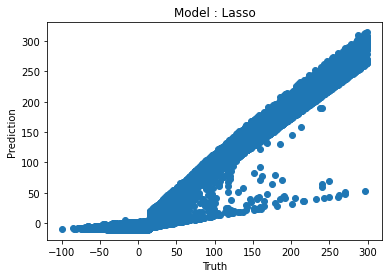

In [14]:
for model, name in zip([Las], 
     ['Lasso']):
 
    model1 = model.fit(X_train_sc,Y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(Y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_predict)))
    print('R2 : ',r2_score(Y_test, Y_predict))
    print()


print(name)
plt.scatter(Y_test, Y_predict)
plt.title("Model : Lasso")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.savefig('/content/drive/My Drive/TAMUIDS/Lasso.png',  bbox_inches='tight')

Ridge
Mean Absolute Error: 7.5607022512280375
Mean Squared Error: 92.01690235791254
Root Mean Squared Error: 9.5925441024742
R2 :  0.9397749446871965

Ridge


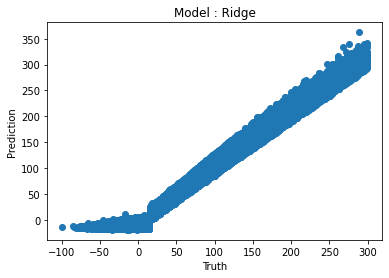

In [15]:
for model, name in zip([Rid], 
     ['Ridge']):
 
    model1 = model.fit(X_train_sc,Y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(Y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_predict)))
    print('R2 : ',r2_score(Y_test, Y_predict))
    print()

print(name)
plt.scatter(Y_test, Y_predict)
plt.title("Model : Ridge")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.savefig('/content/drive/My Drive/TAMUIDS/Ridge.png',  bbox_inches='tight')

In [0]:
for model, name in zip([Bg_Lin], 
     ['Bagged Linear']):
 
    model1 = model.fit(X_train_sc,Y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(Y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_predict)))
    print('R2 : ',r2_score(Y_test, Y_predict))
    print()
  
print(name)
plt.scatter(Y_test, Y_predict)
plt.title("Model : Bagged Linear")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.savefig('/content/drive/My Drive/TAMUIDS/Bagged Linear.png',  bbox_inches='tight')